In [175]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
training = pd.read_csv('TRAIN1.csv')

print(training.describe())

              LAPS      WETPRAC     WETQUALI  PRAC3SECONDS    Q3SECONDS
count  1590.000000  1590.000000  1590.000000   1590.000000  1590.000000
mean     18.579874     0.119497     0.179874     87.533692    86.798224
std       4.161872     0.503165     0.632682     12.936957    13.359347
min       7.000000     0.000000     0.000000     54.064000    53.377000
25%      16.000000     0.000000     0.000000     77.122250    76.236250
50%      18.000000     0.000000     0.000000     88.062500    86.621500
75%      21.000000     0.000000     0.000000     96.621500    95.730750
max      34.000000     3.000000     3.000000    120.158000   129.776000


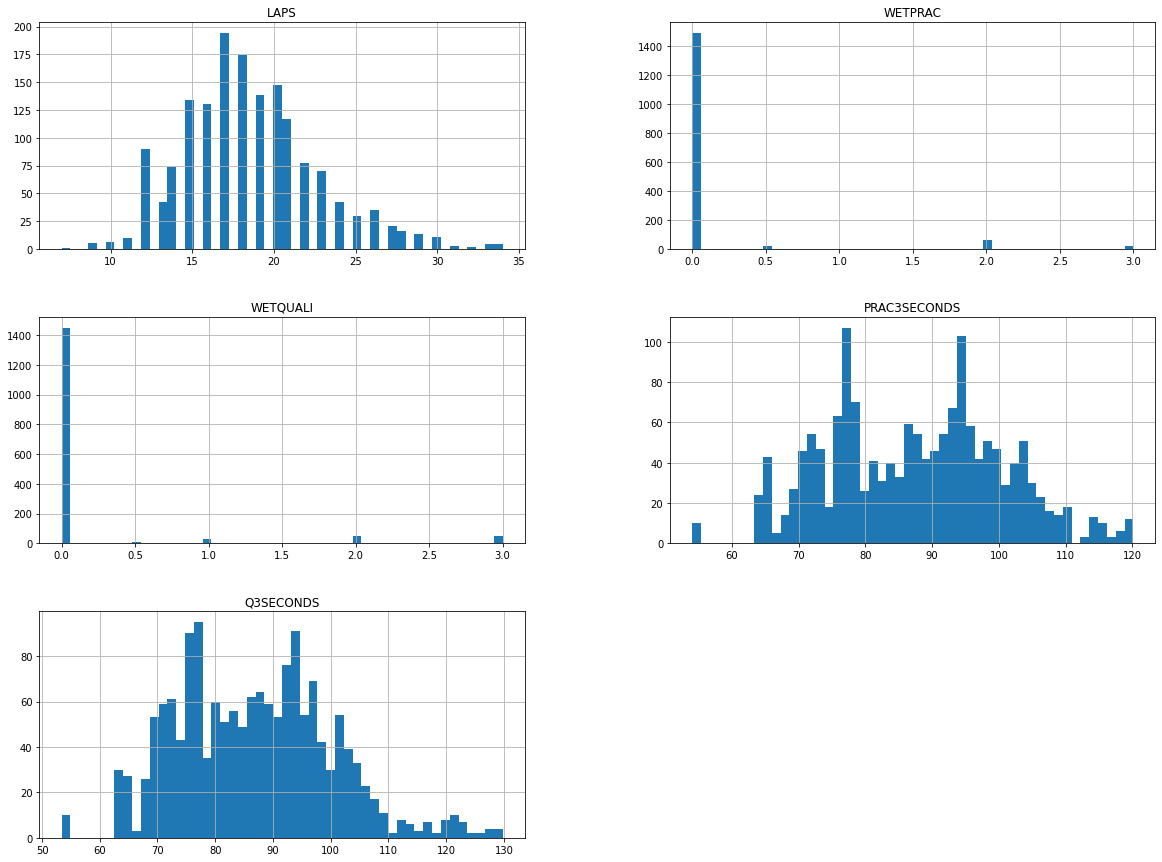

In [176]:
training.hist(bins=50, figsize=(20,15))
plt.show()

In [177]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [178]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(training, test_size=0.2, random_state=42)

test_set

,LAPS,WETPRAC,WETQUALI,PRAC3SECONDS,Q3SECONDS
1079,19,0.0,0.0,65.391,64.200
405,22,0.0,0.0,97.985,97.125
1493,24,0.0,1.0,94.154,104.050
239,16,0.0,0.0,87.809,86.770
610,20,0.0,0.0,94.001,93.194
...,...,...,...,...,...
1023,15,0.0,0.0,103.064,101.069
700,29,3.0,3.0,100.660,95.554
486,12,0.0,0.0,108.742,107.543
672,24,0.0,0.0,88.137,87.356


<AxesSubplot:xlabel='Q3SECONDS', ylabel='PRAC3SECONDS'>

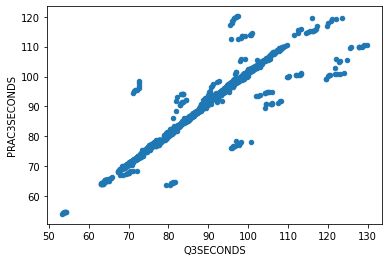

In [179]:
relation = train_set.copy()
relation.plot(kind="scatter", x="Q3SECONDS", y="PRAC3SECONDS")


In [180]:
corr_matrix = train_set.corr()
corr_matrix["Q3SECONDS"].sort_values(ascending=False)

Q3SECONDS       1.000000
PRAC3SECONDS    0.923711
WETQUALI        0.356625
WETPRAC         0.177442
LAPS           -0.142827
Name: Q3SECONDS, dtype: float64

array([[<AxesSubplot:xlabel='LAPS', ylabel='LAPS'>,
        <AxesSubplot:xlabel='WETPRAC', ylabel='LAPS'>,
        <AxesSubplot:xlabel='WETQUALI', ylabel='LAPS'>,
        <AxesSubplot:xlabel='Q3SECONDS', ylabel='LAPS'>,
        <AxesSubplot:xlabel='PRAC3SECONDS', ylabel='LAPS'>],
       [<AxesSubplot:xlabel='LAPS', ylabel='WETPRAC'>,
        <AxesSubplot:xlabel='WETPRAC', ylabel='WETPRAC'>,
        <AxesSubplot:xlabel='WETQUALI', ylabel='WETPRAC'>,
        <AxesSubplot:xlabel='Q3SECONDS', ylabel='WETPRAC'>,
        <AxesSubplot:xlabel='PRAC3SECONDS', ylabel='WETPRAC'>],
       [<AxesSubplot:xlabel='LAPS', ylabel='WETQUALI'>,
        <AxesSubplot:xlabel='WETPRAC', ylabel='WETQUALI'>,
        <AxesSubplot:xlabel='WETQUALI', ylabel='WETQUALI'>,
        <AxesSubplot:xlabel='Q3SECONDS', ylabel='WETQUALI'>,
        <AxesSubplot:xlabel='PRAC3SECONDS', ylabel='WETQUALI'>],
       [<AxesSubplot:xlabel='LAPS', ylabel='Q3SECONDS'>,
        <AxesSubplot:xlabel='WETPRAC', ylabel='Q3SECONDS'>,
     

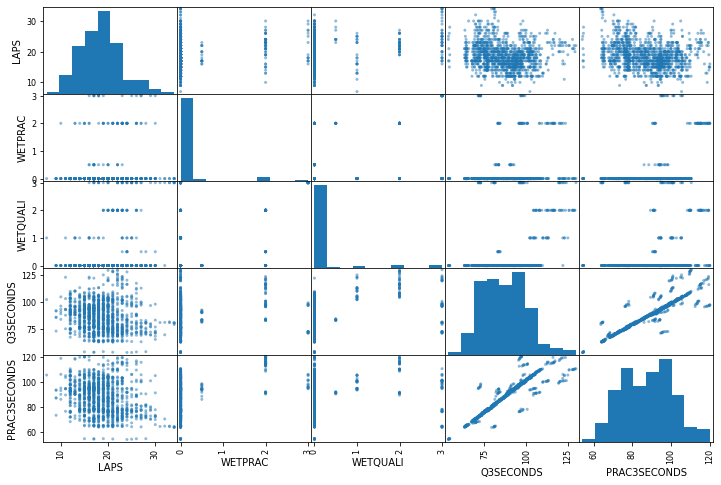

In [181]:
from pandas.plotting import scatter_matrix

attributes = ["LAPS", "WETPRAC",
              "WETQUALI","Q3SECONDS","PRAC3SECONDS"]
scatter_matrix(train_set[attributes], figsize=(12, 8))


In [182]:


trainin = train_set.drop("Q3SECONDS", axis=1)
trainin_labels = train_set["Q3SECONDS"].copy()
trainin_labels



1174    92.321
701     96.702
1479    70.166
528     92.142
987     96.237
         ...  
1130    96.217
1294    92.364
860     63.130
1459    76.750
1126    80.455
Name: Q3SECONDS, Length: 1272, dtype: float64

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

trainin_num_tr = num_pipeline.fit_transform(trainin)
trainin_num_tr

from sklearn.compose import ColumnTransformer

num_attribs = list(trainin)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

trainin_prepared = full_pipeline.fit_transform(trainin)

trainin_prepared

array([[-0.38047487, -0.24213262, -0.28951069,  0.48007869],
       [ 2.52621601,  5.6998485 ,  4.37197788,  1.01533388],
       [-0.38047487, -0.24213262, -0.28951069, -1.28115299],
       ...,
       [-0.13825063, -0.24213262, -0.28951069, -1.81410271],
       [-0.86492335, -0.24213262, -0.28951069, -0.73974985],
       [ 0.34619785, -0.24213262, -0.28951069, -0.53210311]])

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(trainin_prepared, trainin_labels)




LinearRegression()

In [185]:
some_data = trainin.iloc[:5]
some_labels = trainin_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# print("Predictions:", lin_reg.predict(some_data_prepared))

trainin_predictions = lin_reg.predict(trainin_prepared)
# print("Labels:", list(some_labels))
lin_mae = mean_squared_error(trainin_labels, trainin_predictions)
lin_train_rmse = np.sqrt(lin_mae)
print(lin_train_rmse)

2.270553927736319


In [186]:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(trainin_prepared, trainin_labels)



DecisionTreeRegressor(random_state=42)

In [212]:
from sklearn.metrics import mean_squared_error
trainin_predictions = tree_reg.predict(trainin_prepared)
# print(trainin_predictions)
# print(trainin_labels)
tree_mse = mean_squared_error(trainin_labels, trainin_predictions)
tree_train_rmse = np.sqrt(tree_mse)
tree_train_rmse


0.04193530694478645

In [188]:


from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(trainin_prepared, trainin_labels)



RandomForestRegressor(random_state=42)

In [189]:
trainin_predictions = forest_reg.predict(trainin_prepared)
print(trainin_predictions)
print(trainin_labels)

[92.52729 97.70577 70.28498 ... 63.15821 76.92424 80.22815]
1174    92.321
701     96.702
1479    70.166
528     92.142
987     96.237
         ...  
1130    96.217
1294    92.364
860     63.130
1459    76.750
1126    80.455
Name: Q3SECONDS, Length: 1272, dtype: float64


In [190]:

forest_mse = mean_squared_error(trainin_labels, trainin_predictions)
forest_train_rmse = np.sqrt(forest_mse)
forest_train_rmse



0.5609167779858018

In [191]:


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [192]:


from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, trainin_prepared, trainin_labels,
                                scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)



Scores: [0.77127077 1.87100041 2.64592845 1.65957357 1.36436877 2.06278512
 0.85066368 1.13602927 1.93072371 1.6947688 ]
Mean: 1.598711254376181
Standard deviation: 0.5497778905846179


In [193]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, trainin_prepared, trainin_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.72499733 2.05863792 1.90695698 1.64422999 1.04663353 1.78886521
 0.99724042 1.13919325 1.90929284 1.23366104]
Mean: 1.4449708496566465
Standard deviation: 0.44488534463053275


In [194]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, trainin_prepared, trainin_labels,
                                scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.86185864 1.6625982  2.45913801 2.83621271 2.79913169 2.42852398
 1.68897711 2.41287877 2.72411467 1.86208121]
Mean: 2.27355149941091
Standard deviation: 0.43903191315891066


In [195]:
scores = cross_val_score(lin_reg, trainin_prepared, trainin_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      2.273551
std       0.462780
min       1.662598
25%       1.861914
50%       2.420701
75%       2.657871
max       2.836213
dtype: float64

In [196]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(trainin_prepared, trainin_labels)
trainin_predictions = svm_reg.predict(trainin_prepared)
svm_mse = mean_squared_error(trainin_labels, trainin_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
svm_mse

6.037202588684238

In [197]:
scores = cross_val_score(svm_reg, trainin_prepared, trainin_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()


count    10.000000
mean      2.376633
std       0.810618
min       1.421286
25%       1.510119
50%       2.646530
75%       2.959227
max       3.463912
dtype: float64

In [198]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)


grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(trainin_prepared, trainin_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4], 'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [199]:

grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [200]:

grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [201]:


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)





1.8893741648717435 {'max_features': 2, 'n_estimators': 3}
1.5808850184342267 {'max_features': 2, 'n_estimators': 10}
1.5437800386468397 {'max_features': 2, 'n_estimators': 30}
1.5384924442471877 {'max_features': 4, 'n_estimators': 3}
1.543270650922739 {'max_features': 4, 'n_estimators': 10}
1.5240752628650178 {'max_features': 4, 'n_estimators': 30}
1.7935074473633 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.598576337833882 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.7123339892935068 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.6554628099886182 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1.7310738673243926 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
1.6871418033405912 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [202]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=100),
        'max_features': randint(low=1, high=4),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(trainin_prepared, trainin_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f39a81623a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f39dc6738e0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [203]:


cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



1.4865753300311644 {'max_features': 3, 'n_estimators': 52}
1.8375520221160215 {'max_features': 1, 'n_estimators': 15}
1.4836438533224705 {'max_features': 3, 'n_estimators': 72}
1.790561633062259 {'max_features': 1, 'n_estimators': 21}
1.4898879518386565 {'max_features': 3, 'n_estimators': 83}
1.4840124207971865 {'max_features': 3, 'n_estimators': 75}
1.49129472625436 {'max_features': 3, 'n_estimators': 88}
1.7560171335284236 {'max_features': 1, 'n_estimators': 24}
1.4353432295959143 {'max_features': 3, 'n_estimators': 22}
2.3038365717516793 {'max_features': 1, 'n_estimators': 2}


In [214]:
rnd_train_rmse = 1.43
final_model = rnd_search.best_estimator_

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# forest_reg.fit(trainin_prepared, trainin_labels)
final_predictions = final_model.predict(X_test_prepared)

# trainin_predictions = forest_reg.predict(X_test_prepared)
# print(X_test_prepared[:2])
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
rnd_rmse = np.sqrt(final_mse)
rnd_rmse


1.0558769035970659

In [213]:

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(trainin_prepared, trainin_labels)
final_predictions = forest_reg.predict(X_test_prepared)
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
forest_rmse = np.sqrt(final_mse)
forest_rmse


0.9141122245539044

In [211]:

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(trainin_prepared, trainin_labels)
final_predictions = tree_reg.predict(X_test_prepared)
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
tree_rmse = np.sqrt(final_mse)
tree_rmse



1.0502935610891886

In [207]:

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(trainin_prepared, trainin_labels)
final_predictions = lin_reg.predict(X_test_prepared)
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
lin_rmse = np.sqrt(final_mse)
lin_rmse


2.2444874850419243

In [208]:


from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))



array([1.54205053, 2.77444198])

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
training = pd.read_csv('TRAIN1.csv')
trainin = training.drop("Q3SECONDS", axis=1)
X_train_full, X_test, y_train_full, y_test = train_test_split(trainin, training.Q3SECONDS, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# print(X_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test1 = scaler.transform(X_test)


np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test1
y_pred = model.predict(X_new)
# print(y_pred)
# print(X_test[:10])
from sklearn.metrics import mean_squared_error
listofTrue = y_test.values.tolist()
final_mse = mean_squared_error(listofTrue,y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

Epoch 1/50
28/28 [==============================] - 0s 3ms/step - loss: 3972.8516 - val_loss: 36.9754
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 21.3568 - val_loss: 15.0190
Epoch 3/50
28/28 [==============================] - 0s 1ms/step - loss: 13.7094 - val_loss: 12.5989
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 11.7783 - val_loss: 11.3939
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 10.5105 - val_loss: 9.3386
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 9.2135 - val_loss: 9.7567
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 9.1301 - val_loss: 7.9897
Epoch 8/50
28/28 [==============================] - 0s 1ms/step - loss: 7.8995 - val_loss: 7.3820
Epoch 9/50
28/28 [==============================] - 0s 2ms/step - loss: 7.3705 - val_loss: 6.8640
Epoch 10/50
28/28 [==============================] - 0s 1ms/step - loss: 6.9956 - val_loss: 6.7019
Epoch 11

1.8368717454928687

[0.56091678 0.04193531 2.27055393 1.43      ]
[0.91411222 1.05029356 2.24448749 1.0558769  1.83687175]


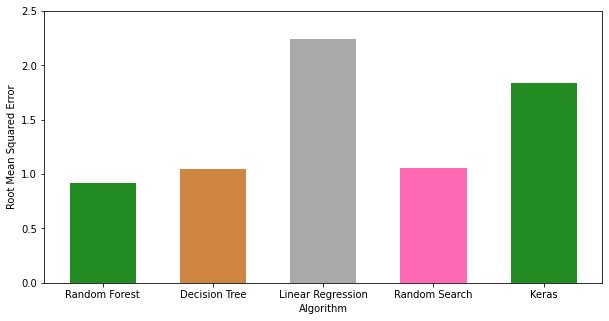

In [210]:
train_acc=np.array([forest_train_rmse,tree_train_rmse,lin_train_rmse,rnd_train_rmse])

test_acc=np.array([forest_rmse,tree_rmse,lin_rmse,rnd_rmse,final_rmse])
print(train_acc)
print(test_acc)
fig = plt.figure(figsize = (10, 5))
plt.ylim(0,2.5)
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Algorithm")
plt.bar(height=test_acc,x=["Random Forest","Decision Tree","Linear Regression","Random Search","Keras"], color =["forestgreen","peru","darkgrey","hotpink"],
        width = 0.6)
plt.show()